#  Deep learning project

This assignment uses deep learning techniques on handwritten digits


In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import Image
%matplotlib inline



Load dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]        # The number of train images
n_test = x_test.shape[0]          # The number of test images

We scale the data to be in $[-1,1]$.

In [3]:
x_train, x_test = x_train / 127.5 - 1, x_test / 127.5 - 1

The size of each data points is $28 \times 28$. While this format will be useful when using CNNs, we will vectorize the datapoints for visualization

In [4]:
nb_features = np.prod(x_train.shape[1:])         # Size of the image(number of pixels)
x_train.resize((n_train, nb_features))         # Resize to 60000*784
x_test.resize((n_test, nb_features))         #Similar

__PCA decomposition__ 
allows us to represent a large
dataset with many correlated variables by using fewer
variables whilst still maintaining high variability in the
original data set. This enables you to visualise high dimensional data in low dimensional space and identify any
underlying clusters or patterns within the data. We will now conduct PCA analysis on the data set

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_train)

print(principalComponents.shape)


(60000, 2)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

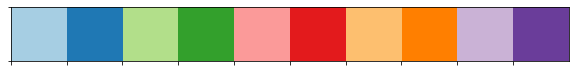

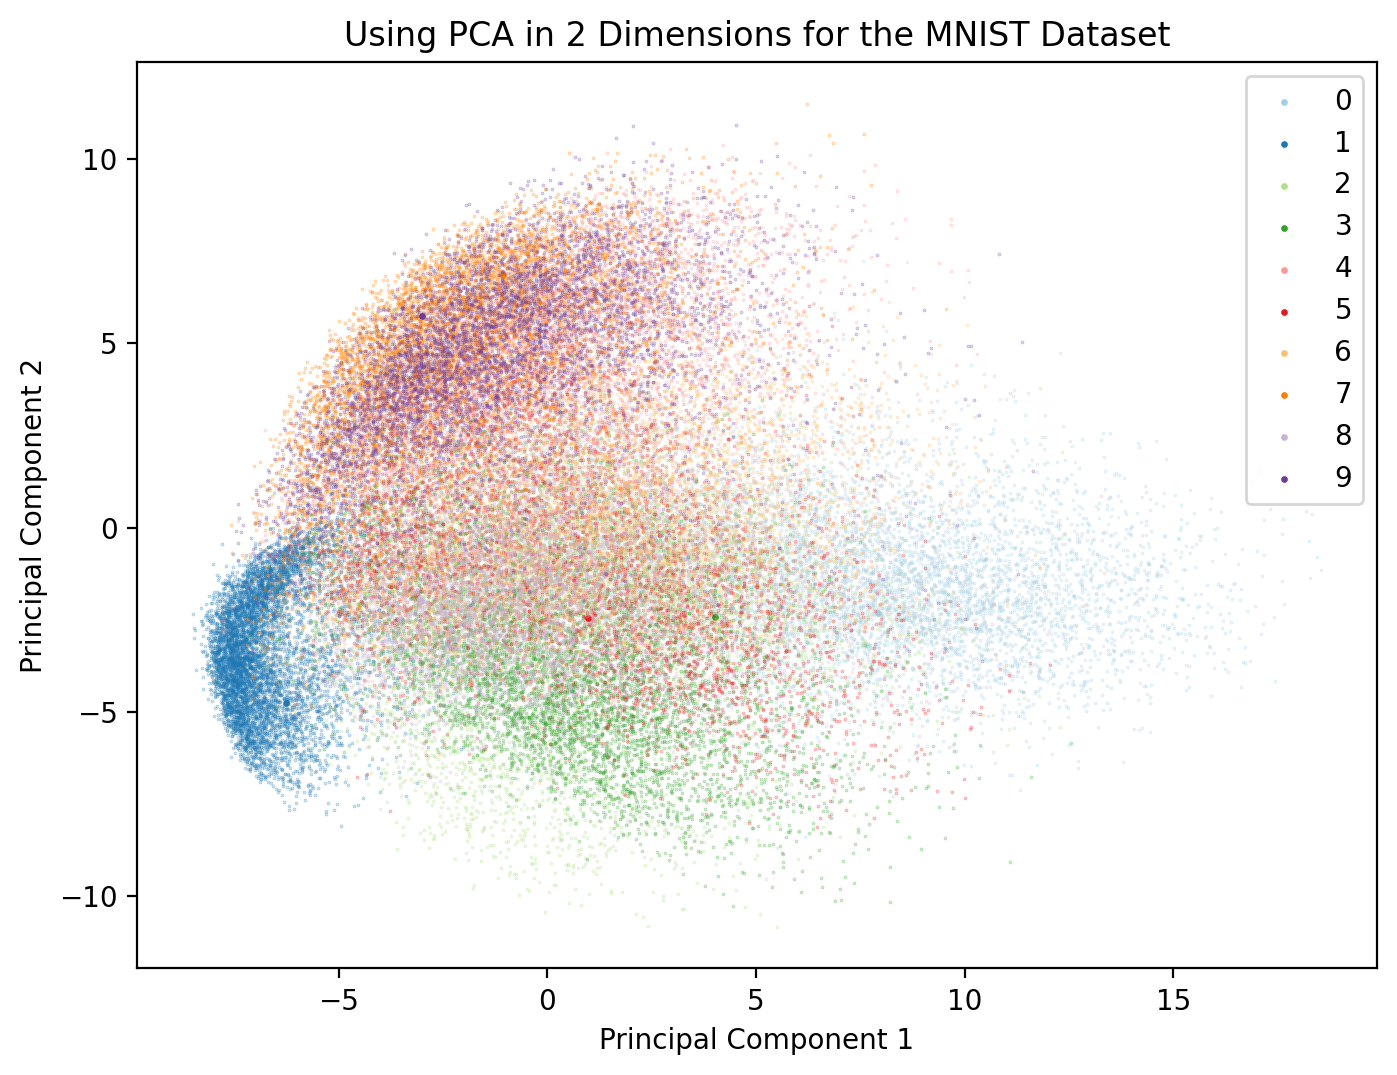

In [6]:
import seaborn as sns

#use colour pallette
numb_cols = sns.color_palette("Paired", 10)
sns.palplot(numb_cols)


# Split up the digits
plt.figure(figsize=(8,6), dpi=200)
#loop through all fdigits
for i in range(10):
    x = principalComponents[y_train[:]==i, 0] 
    y = principalComponents[y_train[:]==i, 1]
    #colour code the digits      
    colr = numb_cols[i]
    plt.scatter(x[0], y[0], s=2, c=colr, alpha=1, label="{}".format(i))
    plt.scatter(x, y, s=0.1, c=colr, alpha=0.4)
plt.title("Using PCA in 2 Dimensions for the MNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

__Single layer Perceptrons__

Single Layer Perceptron is one of the most basic binary classifiers one can use. Here we will implement an iterative algorithm for training the Single Layer Perceptron.

As we are dealing with a binary classification problem, we will pick data points corresponding to classes 0 and 1 (handwritten digits). In addition we choose our binary labels to be -1 and 1, respectively.

In [7]:
cond = (y_train == 0) + (y_train == 1)          # filter on digits 0 and 1
binary_x_train = x_train[cond,:]
binary_y_train = y_train[cond]*1.               # Makes the target floating point

In [8]:
# Make all handwritten 0's = -1 and make all handwritten 1's = 1

binary_y_train[binary_y_train == 0] = -1
binary_y_train[binary_y_train == 1] = 1

In [9]:
#creating test set from test data

condTest = (y_test == 0) + (y_test == 1)         # filter on digits 0 and 1
binary_x_test = x_test[condTest,:]
binary_y_test = y_test[condTest]*1.               # Makes the target floating point


binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1

Next we create the predict function which takes 

__inputs__

+ $x\in\mathbb{R^{n*m}}$, with $n$ being the number of datapoints and $m$ being the feature dimensionality. 
+ $w \in\mathbb{R^m}$ is the parameter vector we wish to learn. 
+ $b \in\mathbb{R}$ is the corresponding bias.

__outputs__ 
+ 'prediction'$\in\mathbb{R^n}$, a vector containing prediction values associated with $x$. 

In [10]:
def predict(x, w, b):
    """
    Predicts the classification of the datapoint
    """
    prediction = np.dot(x, w) + b
    prediction = np.sign(prediction)

    return prediction

+ Next we'll create the optimize function and use the function 'predict' to return the classification accuracy
    #### inputs:
    + $x\in\mathbb{R^{n*m}}$, with $n$ being the number of datapoints and $m$ being the feature dimensionality. 
    + $w \in\mathbb{R^m}$ is the initial parameter vector.
    + $b \in\mathbb{R}$ is the initial bias value.
    + $y\in\mathbb{R^n}$ is the training labels associated with x.
    #### outputs:
    + $w$ is the optimized parameter vector.
    + $b$ the corresponding learned bias.
    + $\text{error}$ is the classification error obtained.  
    

In [11]:
def optimize(x, y):
    iter = 0
    errorNew=np.inf
    n, m = x.shape
    w = np.random.rand(m) # Initialize the w vector
    b = np.random.rand()  # Initialize the b vector
    
    errorList = []
    learning_rate = 0.0001
        
    if iter == 0:
        pred = predict(x, w, b)

        errorNew = (((y - pred)**2).sum())/len(y)
        errorOld = errorNew
        
        wOld = w
        bOld = b
        
        errorList.append(errorNew)
        iter += 1
        
    #run 1000 iterations or if error falls below threshold
        
    while (iter <= 1000) & (errorNew > 1e-1):  
        
        # We subtract because the derivatives point in direction of steepest ascent 
        w = wOld - learning_rate * (-2 * np.dot(x.T, (y - pred)))              # Update our weights, w
        b = bOld - learning_rate * (-2 * (y - pred)).sum() / len(y)            # Update our bias, b

        pred = predict(x, w, b)
        
        errorNew = (((y - pred)**2).sum())/len(y)
        
        #if error less than old update
        if errorNew > errorOld:
            learning_rate *=0.8
            w = wOld
            b = bOld
            continue
        
        
        errorList.append(errorNew)
        errorOld = errorNew
        
        wOld = w
        bOld = b
        
        iter+=1
        
    return w, b, errorList, iter

In [12]:
# get w and b values

the_w, the_b, training_error, iter = optimize(binary_x_train, binary_y_train)

In [13]:
# we will compare classifiers for several sets of digits

digits_to_compare = [[0, 1], [5, 2], [6, 5], [9, 1], [8, 4], [3, 7]]
errors_train = []
errors_test = []
number_of_iterations = []

for pairs in digits_to_compare:

    cond = (y_train == pairs[0]) + (y_train == pairs[1])          # Only digits for 0 and 1
    binary_x_train = x_train[cond,:]
    binary_y_train = y_train[cond]*1.               # Makes the target floating point

    binary_y_train[binary_y_train == pairs[0]] = -1
    binary_y_train[binary_y_train == pairs[1]] = 1


    condTest = (y_test == pairs[0]) + (y_test == pairs[1])          # Only digits for 0 and 1
    binary_x_test = x_test[condTest,:]
    binary_y_test = y_test[condTest]*1.               # Makes the target floating point


    binary_y_test[binary_y_test == pairs[0]] = -1
    binary_y_test[binary_y_test == pairs[1]] = 1

    the_w, the_b, training_error, iter = optimize(binary_x_train, binary_y_train)

    test_prediction = predict(binary_x_test, the_w, the_b)
    error = (((binary_y_test - test_prediction)**2).sum())/len(binary_y_test)

    errors_train.append(training_error)
    errors_test.append(error)
    number_of_iterations.append(iter)

In [14]:
#get test and training errors

for i, pair in enumerate(digits_to_compare):
    print("Pair :", pair)
    print("Training error", errors_train[i][-1])
    print("Test error", errors_test[i])
    print("Converged in {} iterations".format(number_of_iterations[i]))
    print("\n")

Pair : [0, 1]
Training error 0.09538097118041848
Test error 0.05673758865248227
Converged in 3 iterations


Pair : [5, 2]
Training error 0.13533702434308814
Test error 0.14760914760914762
Converged in 1001 iterations


Pair : [6, 5]
Training error 0.12911191463091984
Test error 0.14054054054054055
Converged in 1001 iterations


Pair : [9, 1]
Training error 0.08257820502718462
Test error 0.05783582089552239
Converged in 3 iterations


Pair : [8, 4]
Training error 0.09852048233986145
Test error 0.09815950920245399
Converged in 47 iterations


Pair : [3, 7]
Training error 0.14004517586318166
Test error 0.1648675171736997
Converged in 1001 iterations




### Multi Layer Perceptron

Multi Layer Perceptron (MLP) is a fully connected deep (more than one hidden layer) network. We will now implement a <mark>2 hidden layers MLP</mark> with Recified Linear Unit (ReLU) activations. We will train the model via ADAM optimizer over a cross-entropy loss function.

First of all, we will convert our label vectors to matrices via one-hot encoding (e.g. $y=2$ would become $[0,0,1,0,0,0,0,0,0,0]$). This can be simply done using commands below:

In [15]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

Below, we define a class MLP. It is initialized via:  

+ x_train: The training matrix.
+ y_train: One hot encoding of the corresponding labels.
+ lr: Learning rate used for ADAM optimizer
+ nb_epochs: Number of epochs to use
+ batch_size: The number of data point in each mini-batch
+ output_dir: The directory where model parameters and tensorboard event files will be stored.

We also define the methods: 
* 'create_model' which will desribe a neural network architecture of the form $[784, 1000, 1000, 10]$, each integer representing the number of neurons in a given layer while the length of the vector defines the number of layers accordingly. it defines the class variables: 
   + self.logits $\in \mathbb{R^{10}}$ containing the output __<font color='red'>without activation of the MLP.</font>__
   + self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.
* 'compute_loss' which given the output of 'create_model' will calculate the cross-entropy loss of the mini-batches.
* 'train' where we initiate a tensorflow session and perform the training iterations. 
* 'test' where we load our trained model and perform inference on the test set.

In [16]:
class MLP:
    def __init__(self, x_train, y_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        #number of epochs
        self.nb_epochs = nb_epochs
        #learning rate         
        self.lr = lr
        #batch size
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.nb_features = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        #input layer
        self.im = tf.placeholder(tf.float32, [None, 784])
        self.labels = tf.placeholder(tf.float32, [None, 10])
        self.x_train = x_train
        self.y_train = y_train
        
    def create_model(self):
        with tf.variable_scope('MLP', reuse=tf.AUTO_REUSE):
            #create layers 
            self.layer1 = tf.layers.dense(self.im, 1000, activation=tf.nn.relu)
            self.layer2 = tf.layers.dense(self.layer1, 1000, activation=tf.nn.relu)
            self.logits = tf.layers.dense(self.layer2, 10)
            self.preds = tf.nn.softmax(self.logits)
            
    def compute_loss(self):
        with tf.variable_scope('loss'):
            #create loss function             
            self.loss = tf.losses.softmax_cross_entropy(self.labels, self.preds)
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss)
            
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

Now that we defined our model, our loss and its optimizer. we can instantate the MLP class, initiate our variables, and start the tensorflow session:

In [17]:
tf.reset_default_graph()
# run for 30 epochs
model = MLP(x_train, y_train, './MLP_logdir/', 0.001, 30, 200) 
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)


Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


We can now start training. We loop over the training data points and we feed them to the session in mini-batches form. we repeat this process for each epoch. 

In [18]:
train_ac = []
for epoch in range(model.nb_epochs):
    #randomize the training data set so the network is trained with random batches
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]           
    y_in = model.y_train[randomize,:]
    for i in range(model.nb_iterations):
        # generate input data set to train network       
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train = y_in[i*model.batch_size: (i+1)*model.batch_size]
        
        #train network and get predictions
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.preds, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train, 
                                            model.labels: input_y_train})
        #since predictions are probabilities need to take argmax
        y_preds = np.argmax(preds, axis=1)
        y_real = np.argmax(input_y_train, axis=1)
        # calculate accuracy of batch predictions
        acc_train = np.mean((y_preds==y_real)*1)
        train_ac.append(acc_train)
        print('\r Epoch %d, Iteration %d, loss %.3f, batch accuracy %.3f' %(epoch, i, loss, acc_train),end='')
        if i%1000==0:
            print('Epoch %d, Iteration %d, loss %.3f, batch accuracy %.3f' %(epoch, i, loss, acc_train))
        #write to tensorboard
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  
# sess.close()

 Epoch 0, Iteration 0, loss 2.309, batch accuracy 0.055Epoch 0, Iteration 0, loss 2.309, batch accuracy 0.055
 Epoch 1, Iteration 0, loss 2.351, batch accuracy 0.110Epoch 1, Iteration 0, loss 2.351, batch accuracy 0.110
 Epoch 2, Iteration 0, loss 2.346, batch accuracy 0.115Epoch 2, Iteration 0, loss 2.346, batch accuracy 0.115
 Epoch 3, Iteration 0, loss 2.346, batch accuracy 0.115Epoch 3, Iteration 0, loss 2.346, batch accuracy 0.115
 Epoch 4, Iteration 0, loss 2.366, batch accuracy 0.095Epoch 4, Iteration 0, loss 2.366, batch accuracy 0.095
 Epoch 5, Iteration 0, loss 2.326, batch accuracy 0.135Epoch 5, Iteration 0, loss 2.326, batch accuracy 0.135
 Epoch 5, Iteration 299, loss 2.316, batch accuracy 0.145WARNING:tensorflow:From C:\Users\aksha\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:

Similarly we loop over the test dataset and get the test accuracy via:

In [19]:
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds = []
test_ac = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]        # This batch of x_test datapoints
    preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})           # The predictions (one hot encode) for the current batch
    preds.append(np.argmax(preds_test, axis=1))                            # Append the predictions (the actual digit prediction)
    
    
    if np.mod(nb_test_points, batch_size_test) !=0:                 # If numb_test_points % batch_size != 0
        input_x_test = x_test[i*batch_size_test: -1]             # Change the input to be "the rest (< batch_size)"
        preds_test = sess.run(model.preds,  
                             feed_dict={model.im: input_x_test})  # Same as before
        preds.append(np.argmax(preds, axis=1))
        
        
    cur_all_preds = np.concatenate(preds, axis =0)
    cur_y_real = np.argmax(y_test, axis=1)[:(i+1)*batch_size_test]
    cur_acc_test = np.mean((cur_all_preds==cur_y_real)*1)
    test_ac.append(cur_acc_test)
        
all_preds = np.concatenate(preds, axis =0)
y_real = np.argmax(y_test, axis=1)
acc_test = np.mean((all_preds==y_real)*1)
print('Test accuracy achieved: %.3f' %acc_test)

Test accuracy achieved: 0.103


We can now plot how the training and test accuracy changes with over each iteration

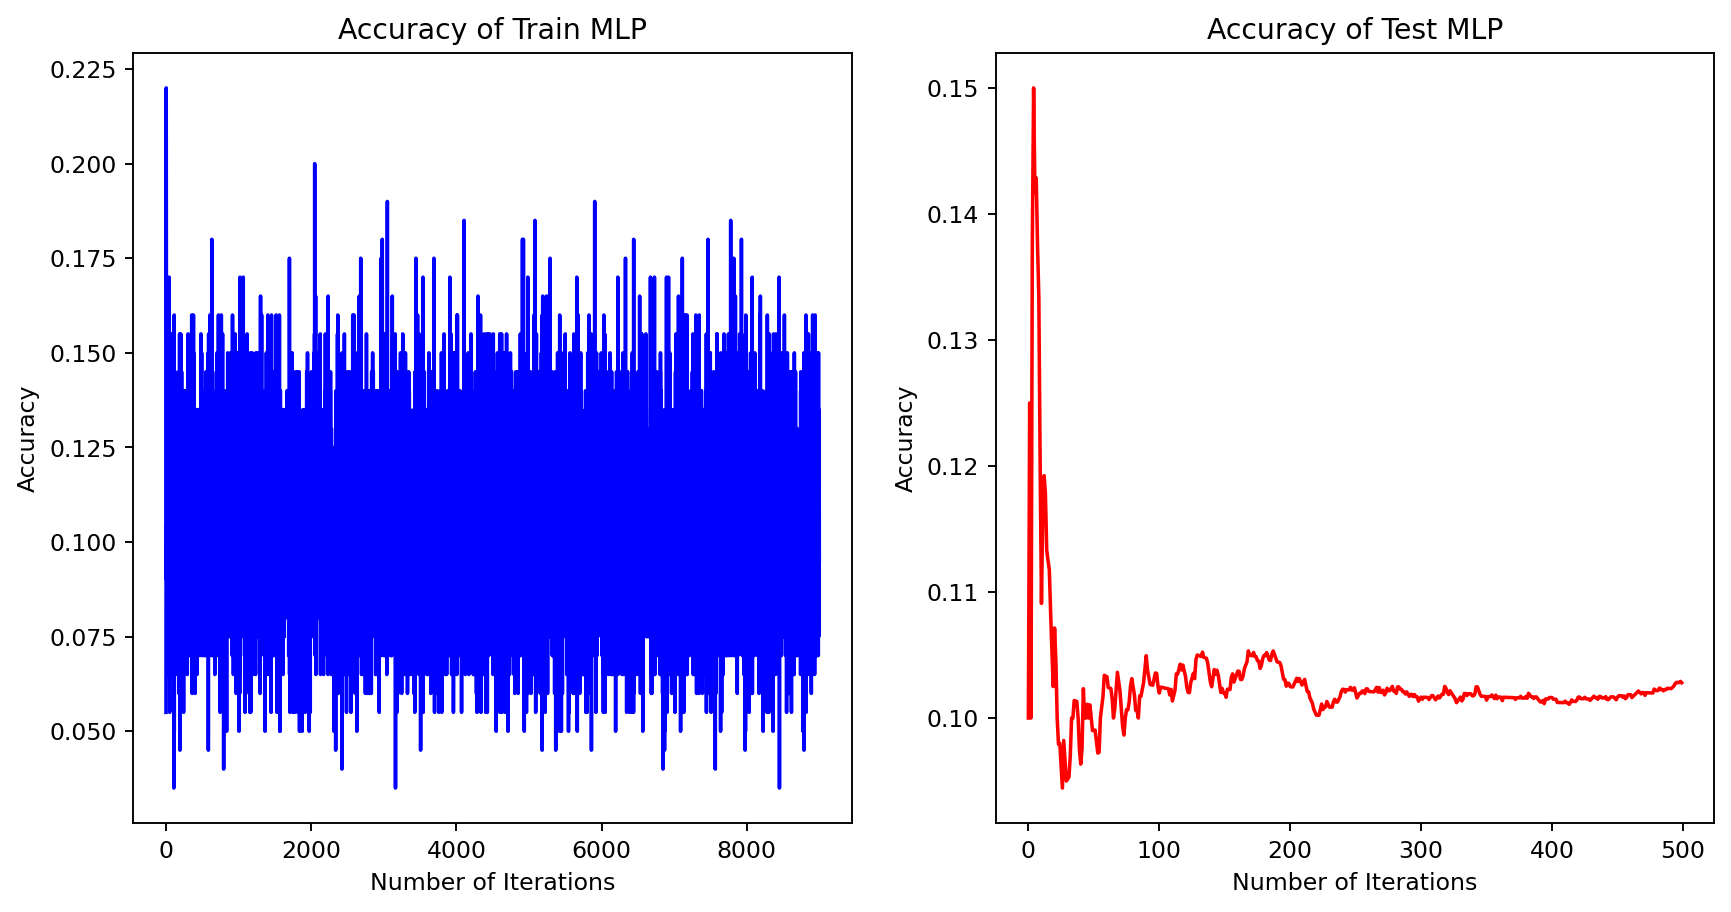

In [20]:
# plot accuracy of training and test accuracy

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), dpi=170, sharex=False, sharey=False)
ax[0].plot(np.arange(0, len(train_ac)), train_ac, "b-", label="Train")
ax[0].set_xlabel("Number of Iterations")
ax[0].set_ylabel("Accuracy")
ax[0].set_title("Accuracy of Train MLP")

ax[1].plot(np.arange(0, len(test_ac)), test_ac, "r-", label="Test")
ax[1].set_xlabel("Number of Iterations")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy of Test MLP")
plt.show()



We now close the tensorflow session:

In [21]:
sess.close()

### Convolutional Neural Network
Now that we are more familiar with the MLP algorithm, it is time to see how it compares with a Convolutional Neural Network (CNN). CNNs leverage dependencies between neighbouring pixels, making them more efficient and light weight compared to their fully connected counter part. In this section we will implement a Class CNN similar to the one we defined before for MLP.

Here we implement a CNN of the shape [32, 64, 128]; where 32, 64, 128 represent the number of convolutional filters for each hidden layer. We will use a kernel size of size $4\times4$. 

Will Use a stride of 1 in the first convolutional layer, followed by a stride of 2 for the following layers (a stride of two help downsampling without requiring the use of pooling layers). Then we vectorize the obtained output using tf.layer.flatten, and end the model with a fully connected layer of 10 neurons. Using ReLU as the non linear activation for the hidden layers.

In [22]:
# Params: 1,604,362  , W: 1,604,096,  B: 266
class CNN:
    def __init__(self, x_train, y_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.placeholder(tf.float32, [None, 28, 28, 1])
        self.labels = tf.placeholder(tf.float32, [None, 10])
        self.x_train = x_train[:,:,:, np.newaxis]
        self.y_train = y_train
        
    def create_model(self):
        with tf.variable_scope('CNN', reuse=tf.AUTO_REUSE):
            ######### Complete the function ######### 
            self.layer1 = tf.layers.conv2d(strides=(1,1),kernel_size=(4,4),inputs=self.im, filters=32, activation=tf.nn.relu)
            self.layer2 = tf.layers.conv2d(strides=(2,2),kernel_size=(4,4),inputs=self.layer1, filters=64, activation=tf.nn.relu)
            self.layer3 = tf.layers.conv2d(strides=(1,1),kernel_size=(4,4),inputs=self.layer2, filters=128, activation=tf.nn.relu)
            self.layer4 = tf.layers.flatten(self.layer3)
            self.logits = tf.layers.dense(self.layer4, 10)
            
            print(self.layer1, "\n", self.layer2, "\n", self.layer3, "\n", self.layer4, "\n", self.logits)
            self.preds = tf.nn.softmax(self.logits)
            #########################################
    
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss = tf.losses.softmax_cross_entropy(self.labels, self.logits)
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss)
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

CNNs leverage dependencies between neighbouring pixels, however this information is partially lost when we vectorized our data. For training CNNs we will need to recover our initial shape of $N \times 28 \times 28$.

In [23]:
edge = int(np.sqrt(nb_features))
x_train.resize([n_train, edge, edge])
x_test.resize([n_test, edge, edge])

We instantiate our CNN class, start the corresponging tensorflow session and initiate the trainable variables. 

In [24]:
tf.reset_default_graph()

model = CNN(x_train, y_train, './CNN_logdir/', 0.001, 10, 15)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Tensor("CNN/conv2d/Relu:0", shape=(?, 25, 25, 32), dtype=float32) 
 Tensor("CNN/conv2d_1/Relu:0", shape=(?, 11, 11, 64), dtype=float32) 
 Tensor("CNN/conv2d_2/Relu:0", shape=(?, 8, 8, 128), dtype=float32) 
 Tensor("CNN/flatten/Reshape:0", shape=(?, 8192), dtype=float32) 
 Tensor("CNN/dense/BiasAdd:0", shape=(?, 10), dtype=float32)


We start training:

prediction 0


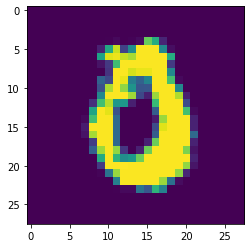

prediction 3


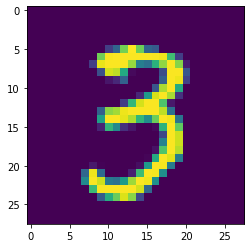

prediction 4


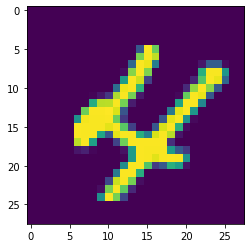

prediction 4


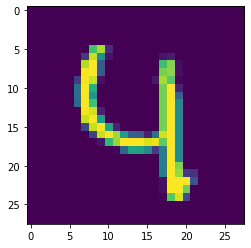

prediction 6


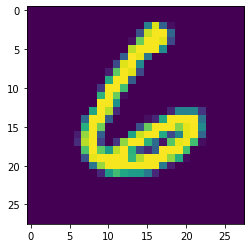

prediction 3


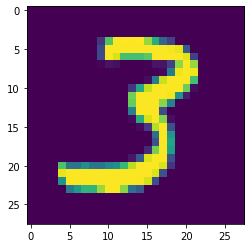

prediction 9


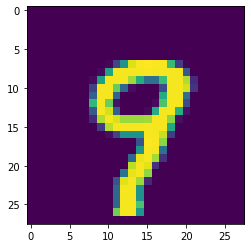

prediction 4


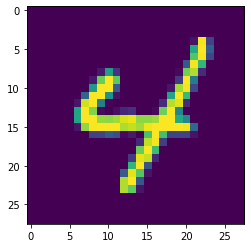

prediction 0


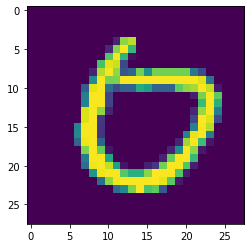

prediction 2


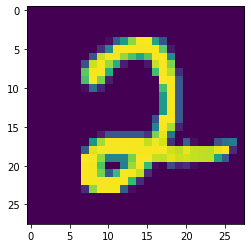

prediction 4


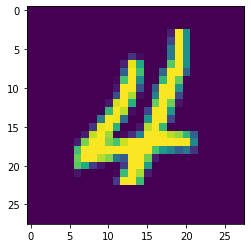

prediction 4


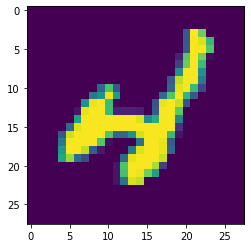

prediction 1


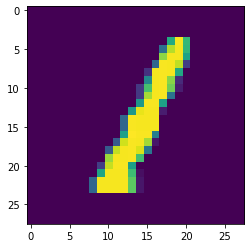

prediction 5


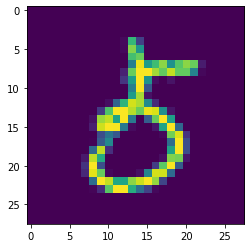

prediction 7


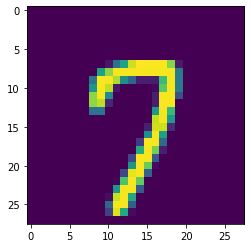

prediction 1


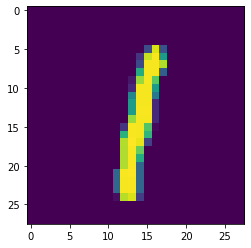

prediction 4


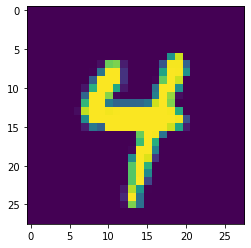

prediction 8


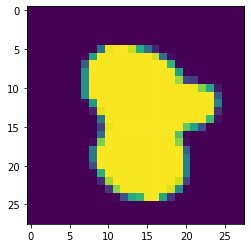

prediction 1


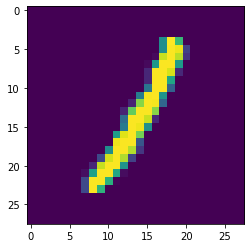

prediction 9


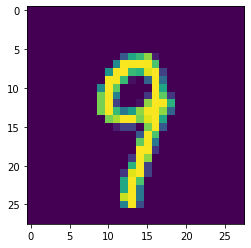

In [25]:
for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in = model.y_train[randomize,:]
    
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train = y_in[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.preds, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train, 
                                            model.labels: input_y_train})
        y_preds = np.argmax(preds, axis=1)
        
        y_real = np.argmax(input_y_train, axis=1)
        acc_train = np.mean((y_preds==y_real)*1)
    
#   visualise some of the predictions
    print('prediction',y_preds[1])
    
    #plt.imshow(x_in[0,:,:,0])
    plt.imshow(input_x_train[1,:,:,0])
    plt.show()
    
    print('prediction',y_preds[2])
    plt.imshow(input_x_train[2,:,:,0])
    plt.show()
    
    


we loop over the test dataset and compute the corresponding classification accuracy. 

In [26]:
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    input_x_test = input_x_test[:, :, :,np.newaxis]
    preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
    preds.append(np.argmax(preds_test, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
        preds.append(np.argmax(preds, axis=1))
all_preds = np.concatenate(preds, axis =0)
y_real = np.argmax(y_test, axis=1)
acc_test = np.mean((all_preds==y_real)*1)
print('Test accuracy achieved: %.3f' %acc_test)
# sess.close()

Test accuracy achieved: 0.991


### Visualizing learned filters and activations
It is sometimes useful to visualize what kind of filters a CNN have learned. One way to do so is to plot each filter of size [kernel_size $\times$ kerne_size]. 


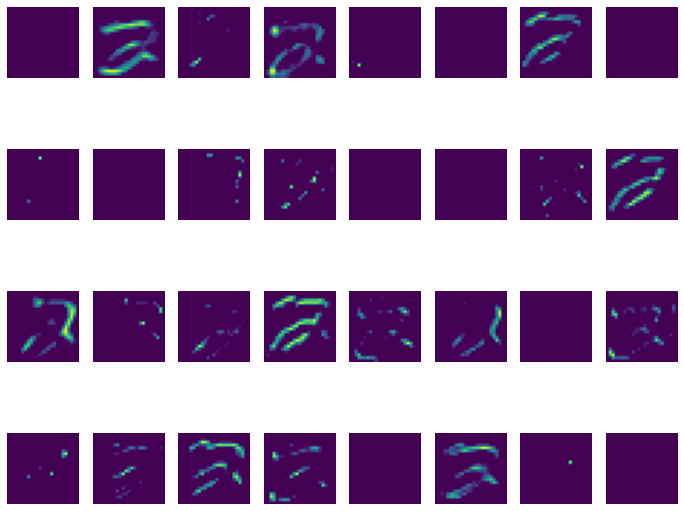

In [27]:
# print filters
layer1_shape = sess.run(model.layer1, feed_dict={model.im: input_x_test}).shape

fig, ax = plt.subplots(figsize=(12, 10), nrows = 4, ncols=8, sharex=False, sharey=False, )
count=0
for i in np.arange(0, 4):
    for j in np.arange(0, 8):
        count+=1
        xy = sess.run(model.layer1, feed_dict={model.im: input_x_test})[0,:,:,count-1]
        ax[i, j].imshow(xy)
        ax[i, j].axis("off")

plt.show()

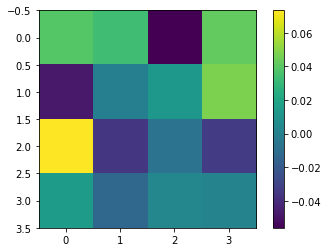

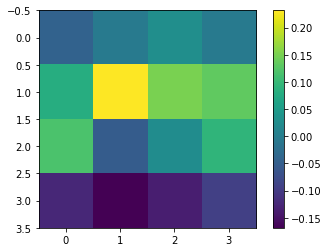

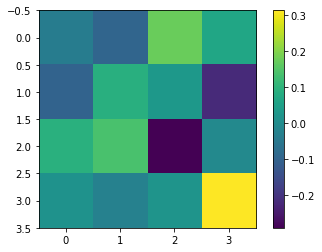

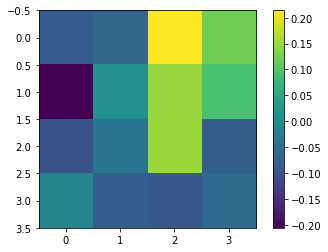

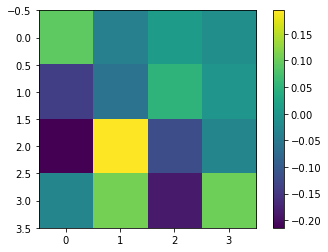

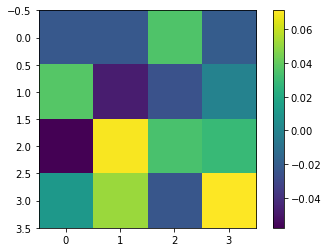

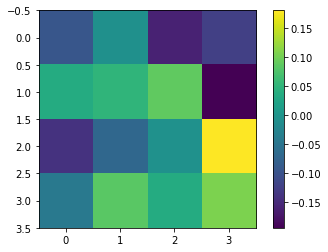

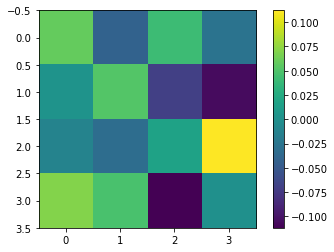

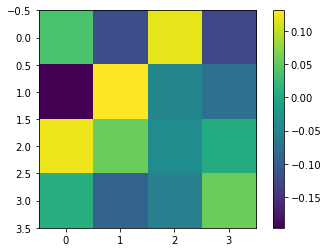

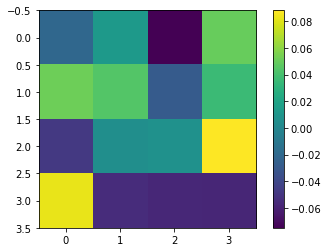

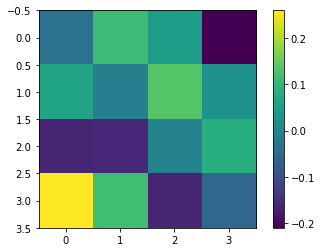

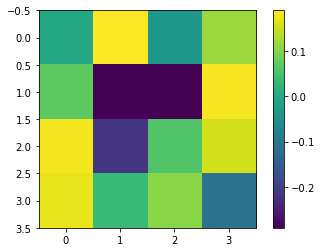

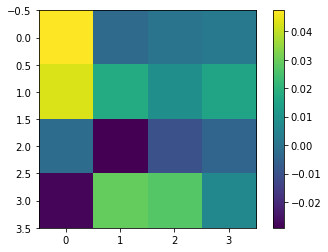

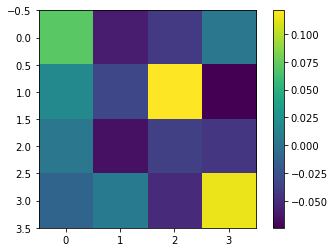

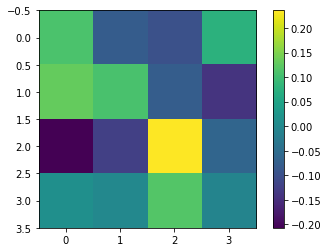

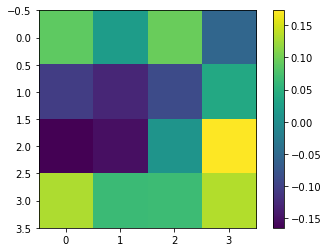

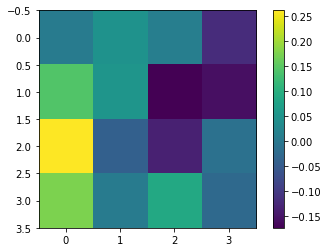

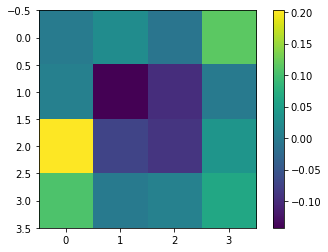

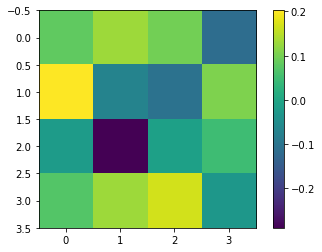

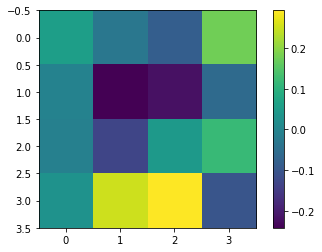

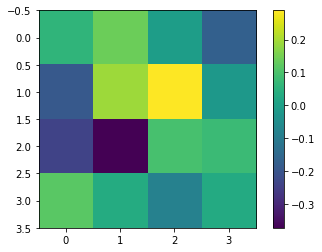

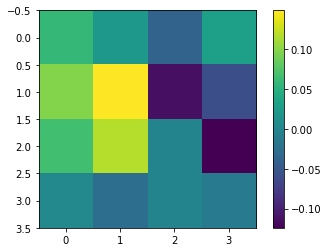

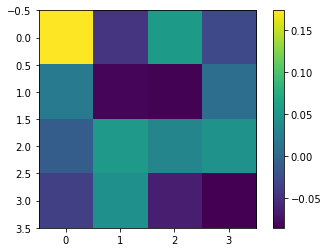

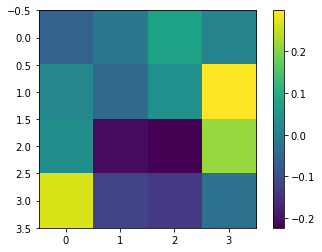

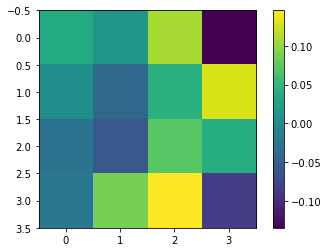

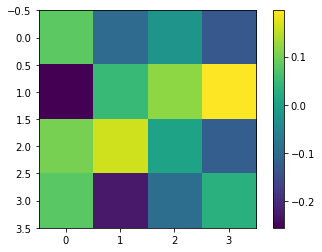

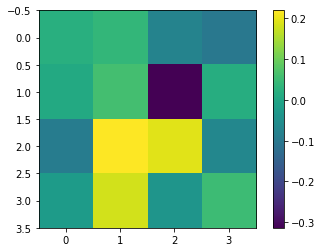

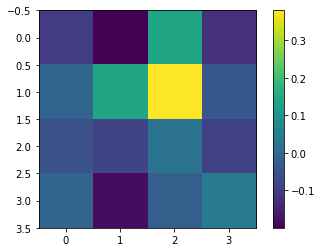

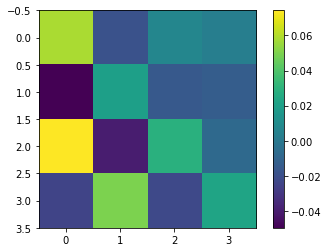

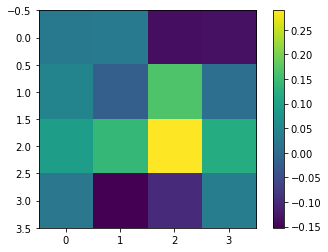

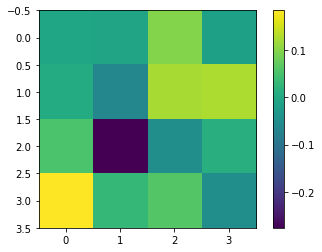

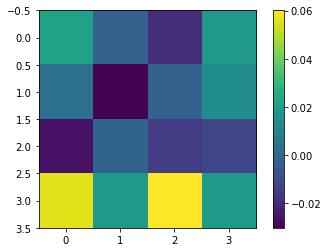

In [28]:
# print Kernals 

for i in range(sess.run(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)[0]).shape[3]):
  
    xy = sess.run(tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)[0])[:,:,0,i]

    plt.imshow(xy)
    plt.colorbar()
    plt.show()
    

In [29]:
sess.close()

### Denoising Auto-Encoder

While CNNs make very good classifiers, they can also be used for many various tasks such as regression, image generation, image reconstruction. Next we will implement a fully convolutional de-noising auto-encoder, i.e. a network that takes a noisy image as input and outputs the corresponding cleaned output. In this exercise we will introduce a gaussian noise on each input. Our goal is to recover the original noiseless images in the output.

Similarly as before we will define the class DAE

Note that we don't have a classification problem anymore but a regression problem consisting of reconstructing the noiseless version of the input. 

In [30]:
class DAE:
    def __init__(self, x_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs      
        self.nb_images, self.edge, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.placeholder(tf.float32, [None, 28, 28,1])
#       noisy image
        self.im_n = self.im + tf.random_normal(tf.shape(self.im), mean=0, stddev=1) #inject noise
        self.im_n = tf.clip_by_value(self.im_n, -1, 1)
        self.x_train = x_train
        
    def create_model(self):
        with tf.variable_scope('DAE', reuse=tf.AUTO_REUSE):

            
            self.layer1 = tf.layers.conv2d(strides=(1,1),kernel_size=(4,4),inputs=self.im_n, filters = 32, activation=tf.nn.relu)
            
            self.layer2 = tf.layers.conv2d(strides=(2,2),kernel_size=(4,4),inputs=self.layer1, filters=64, activation=tf.nn.relu)
            self.layer3 = tf.layers.conv2d(strides=(2,2),kernel_size=(4,4),inputs=self.layer2, filters=128, activation=tf.nn.relu)
            
            self.layer4 = tf.layers.conv2d_transpose(strides=2,kernel_size=(4,4),inputs=self.layer3, filters =64, activation=tf.nn.relu)
            
            self.layer5 = tf.layers.conv2d_transpose(strides=2,kernel_size=(4,4),inputs=self.layer4, filters=32, activation=tf.nn.relu)

            self.recon_im = tf.layers.conv2d(strides=1,kernel_size=(4,4),inputs=self.layer5, filters=1, activation=tf.nn.tanh, padding = 'same')
            
            # pad image
            self.recon_im = tf.pad(self.recon_im, [[0, 0], [3, 3], [3, 3], [0, 0]], constant_values=-1)
            tf.summary.image('denoising', tf.concat([self.im_n, self.recon_im], axis=2))
    
    def compute_loss(self):
        with tf.variable_scope('loss'):
            self.loss = tf.losses.mean_squared_error(self.im,  self.recon_im)
            self.loss_summ = tf.summary.scalar("reconstruction_loss", self.loss)
                             
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

In [31]:
tf.reset_default_graph()

model = DAE(x_train, './DAE_logdir/', 0.001, 25, 300)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [32]:
for epoch in range(model.nb_epochs):

    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    
    #reshape x
    x_in = x_in.reshape(-1,28, 28 ,1)

    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
    
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.recon_im, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train})
        
        y_preds = preds

        if i%100==0:
            print('Epoch %d, Iteration %d, loss %.3f' %(epoch, i, loss))
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  

Epoch 0, Iteration 0, loss 0.550
Epoch 0, Iteration 100, loss 0.065
Epoch 1, Iteration 0, loss 0.057
Epoch 1, Iteration 100, loss 0.051
Epoch 2, Iteration 0, loss 0.048
Epoch 2, Iteration 100, loss 0.047
Epoch 3, Iteration 0, loss 0.047
Epoch 3, Iteration 100, loss 0.047
Epoch 4, Iteration 0, loss 0.044
Epoch 4, Iteration 100, loss 0.044
Epoch 5, Iteration 0, loss 0.045
Epoch 5, Iteration 100, loss 0.045
Epoch 6, Iteration 0, loss 0.043
Epoch 6, Iteration 100, loss 0.045
Epoch 7, Iteration 0, loss 0.044
Epoch 7, Iteration 100, loss 0.042
Epoch 8, Iteration 0, loss 0.043
Epoch 8, Iteration 100, loss 0.041
Epoch 9, Iteration 0, loss 0.043
Epoch 9, Iteration 100, loss 0.041
Epoch 10, Iteration 0, loss 0.042
Epoch 10, Iteration 100, loss 0.041
Epoch 11, Iteration 0, loss 0.043
Epoch 11, Iteration 100, loss 0.044
Epoch 12, Iteration 0, loss 0.043
Epoch 12, Iteration 100, loss 0.041
Epoch 13, Iteration 0, loss 0.042
Epoch 13, Iteration 100, loss 0.042
Epoch 14, Iteration 0, loss 0.041
Epoch 

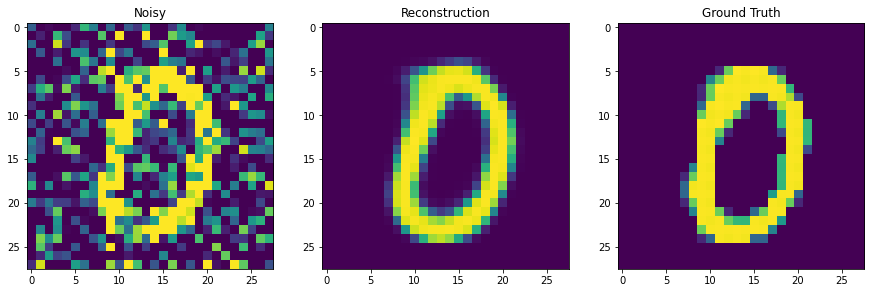

In [33]:
# compare noisy, reconstruction and ground truth

x, y, t = sess.run([model.im_n, model.recon_im, model.im], feed_dict = {model.im : x_in[[4000]]})


fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i, m in enumerate([x, y, t]):
    ax[i].imshow(m[0,:,:,0], vmin = -1, vmax = 1)
    ax[i].set_title(['Noisy', 'Reconstruction', 'Ground Truth'][i])
    
plt.show()

We will now train the DAE by looping over all the mini-batches. For proper training we will input enough noisy versions per image. 

When the training is finished, inject noise into the test data and reconstruct them through a forward pass. For each test image, we will input 20 noisy versions of it and compute the average accuracies 

In [34]:


# use multiple noise levels
noise_level = [0.5, 1, 2, 3, 4]


DAE_Train_Dict = {}     # This will be where we store the training errors.


for noise in noise_level:
    ################################ TRAIN THE MODEL #############################################
    class DAE:
        def __init__(self, x_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
            self.nb_epochs = nb_epochs
            self.lr = lr
            self.batch_size = batch_size
            self.nb_epochs = nb_epochs

            self.nb_images, self.edge, _ = x_train.shape
            self.nb_iterations = self.nb_images // batch_size
            self.output_dir = output_dir
            self.im = tf.placeholder(tf.float32, [None, 28, 28,1])
            self.im_n = self.im + tf.random_normal(tf.shape(self.im), mean=0, stddev=noise) #inject noise
            # clip              
            self.im_n = tf.clip_by_value(self.im_n, -1, 1)
            self.x_train = x_train

        def create_model(self):
            with tf.variable_scope('DAE', reuse=tf.AUTO_REUSE):

                self.layer1 = tf.layers.conv2d(strides=(1,1),kernel_size=(4,4),inputs=self.im_n, filters = 32, activation=tf.nn.relu)

                self.layer2 = tf.layers.conv2d(strides=(2,2),kernel_size=(4,4),inputs=self.layer1, filters=64, activation=tf.nn.relu)
                self.layer3 = tf.layers.conv2d(strides=(2,2),kernel_size=(4,4),inputs=self.layer2, filters=128, activation=tf.nn.relu)

                self.layer4 = tf.layers.conv2d_transpose(strides=2,kernel_size=(4,4),inputs=self.layer3, filters =64, activation=tf.nn.relu)

                self.layer5 = tf.layers.conv2d_transpose(strides=2,kernel_size=(4,4),inputs=self.layer4, filters=32, activation=tf.nn.relu)

                self.recon_im = tf.layers.conv2d(strides=1,kernel_size=(4,4),inputs=self.layer5, filters=1, activation=tf.nn.tanh, padding = 'same')


                self.recon_im = tf.pad(self.recon_im, [[0, 0], [3, 3], [3, 3], [0, 0]], constant_values=-1)
                tf.summary.image('denoising', tf.concat([self.im_n, self.recon_im], axis=2))

        def compute_loss(self):
            with tf.variable_scope('loss'):

                self.loss = tf.losses.mean_squared_error(self.im,  self.recon_im)
                self.loss_summ = tf.summary.scalar("reconstruction_loss", self.loss)

        def optimizer(self):
            with tf.variable_scope('optimizer'):
                optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
                self.model_vars = tf.trainable_variables()
                self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)
    
    
    
    # Now we train the model
    tf.reset_default_graph()

    model = DAE(x_train, './DAE_logdir/', 0.0001, 15, 250)
    model.create_model()
    model.compute_loss()
    model.optimizer()
    init = (tf.global_variables_initializer(),
            tf.local_variables_initializer())

    saver = tf.train.Saver()
    summary =tf.Summary()
    sess = tf.InteractiveSession()
    sess.run(init)
    writer = tf.summary.FileWriter(model.output_dir)
    writer.add_graph(sess.graph)
    if not os.path.exists(model.output_dir):
        os.makedirs(model.output_dir)
    
    
    train_ers = []
    for epoch in range(model.nb_epochs):
        randomize = np.arange(x_train.shape[0])
        np.random.shuffle(randomize)
        x_in = model.x_train[randomize,:]
        x_in = x_in.reshape(-1,28, 28 ,1)
        for i in range(model.nb_iterations):
            input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
            _ , preds, loss, loss_summ = sess.run([model.trainer, model.recon_im, model.loss, model.loss_summ], 
                                     feed_dict={model.im: input_x_train})
            
            y_preds = preds
            
            train_ers.append(loss)
            
            if i%10==0:
                print("\r TRAINING: Epoch {}, Iteration {}, loss {}.3f".format(epoch, i, loss), end="")
            writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
        saver.save(sess, model.output_dir, global_step=epoch)  
    # save training error to dictionary
    DAE_Train_Dict[noise] = train_ers
    


 

 TRAINING: Epoch 14, Iteration 230, loss 0.021142611280083656.3fWARNING:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C49DE95E48>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C49DE95E48>>: AssertionError: Bad argument number for Name: 3, expecting 4


 TRAINING: Epoch 14, Iteration 230, loss 0.04833340644836426.3ffWARNING:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C497B6B388>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C497B6B388>>: AssertionError: Bad argument number for Name: 3, expecting 4


 TRAINING: Epoch 14, Iteration 230, loss 0.12739314138889313.3fWARNING:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C4974207C8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C4974207C8>>: AssertionError: Bad argument number for Name: 3, expecting 4
 TRAINING: Epoch 14, Iteration 230, loss 0.1918690949678421.3ffWARNING:tensorflow:Entity <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x000001C49F83FFC8>> could not be transformed and will be executed as-is. Please report this to the AutgoGraph team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. C

 TRAINING: Epoch 14, Iteration 230, loss 0.2200908213853836.3ff

In [35]:
# noiseArr = np.array([x/4 for x in range(20)])

In [36]:
# np.repeat(noiseArr,len(x_test)).shape

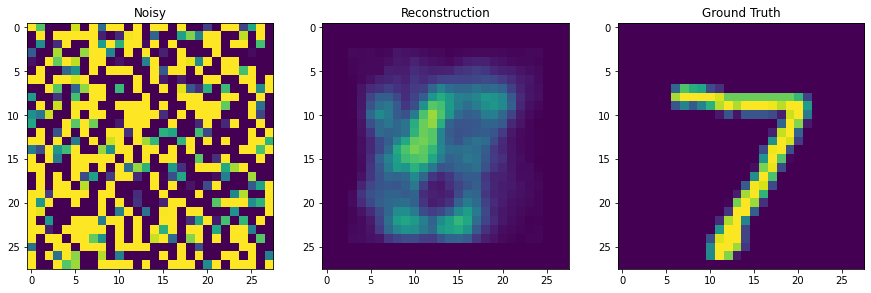

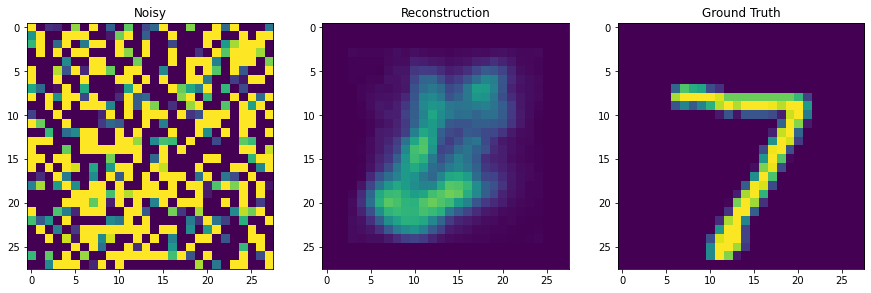

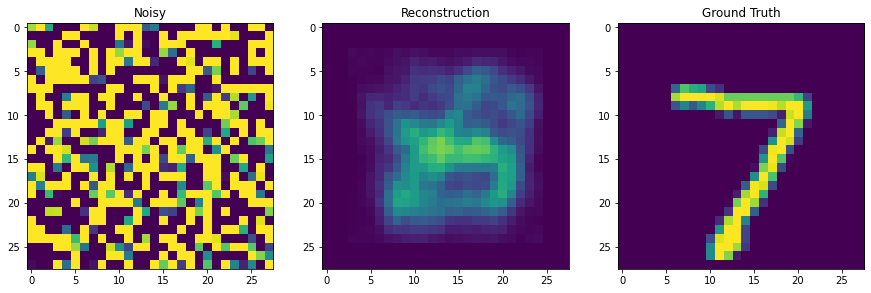

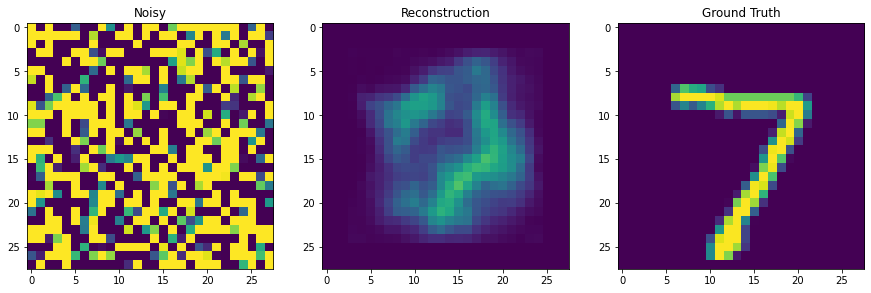

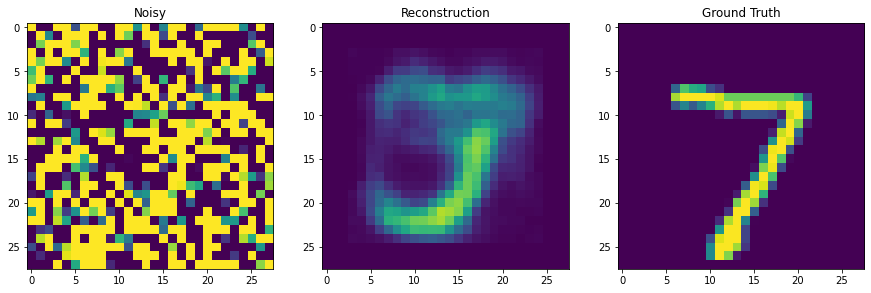

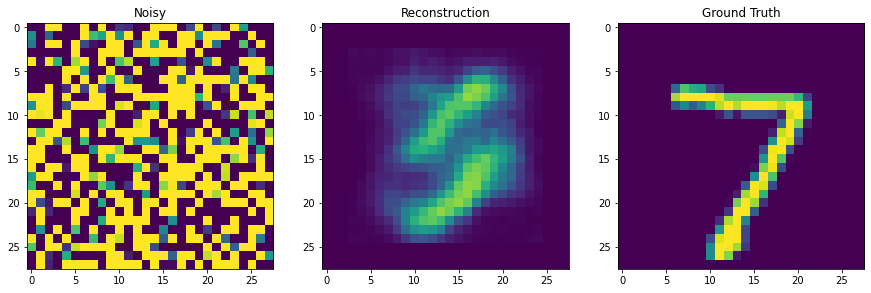

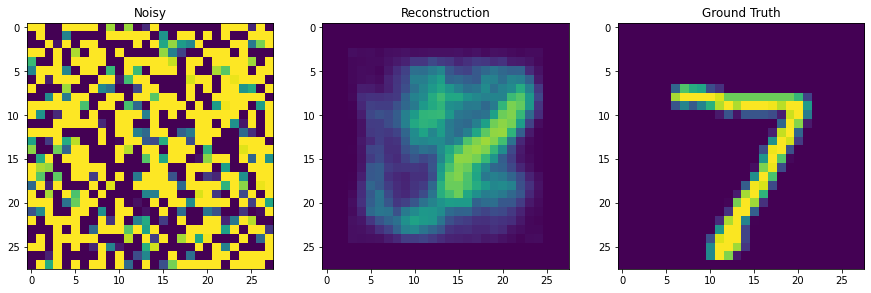

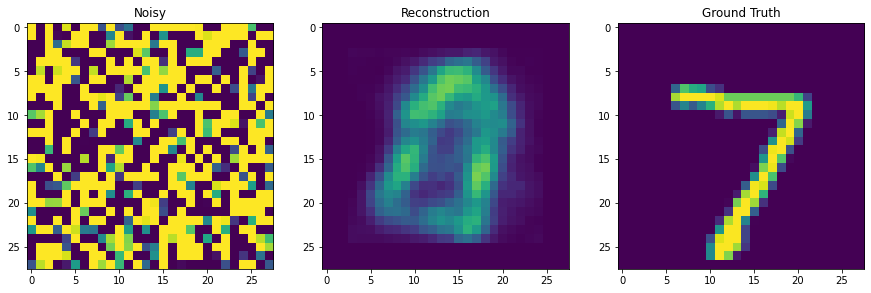

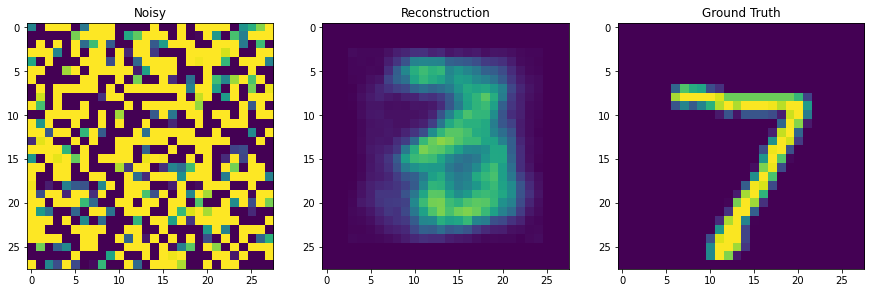

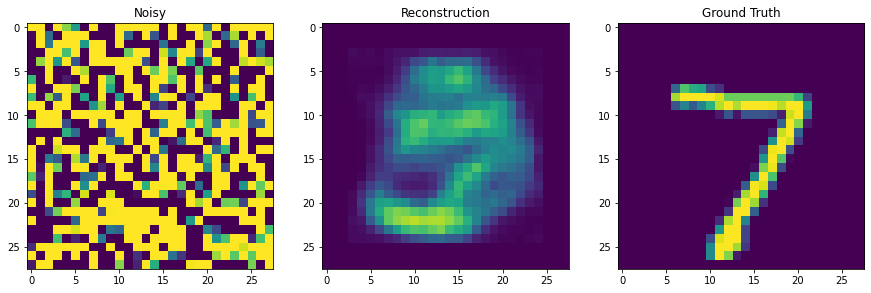

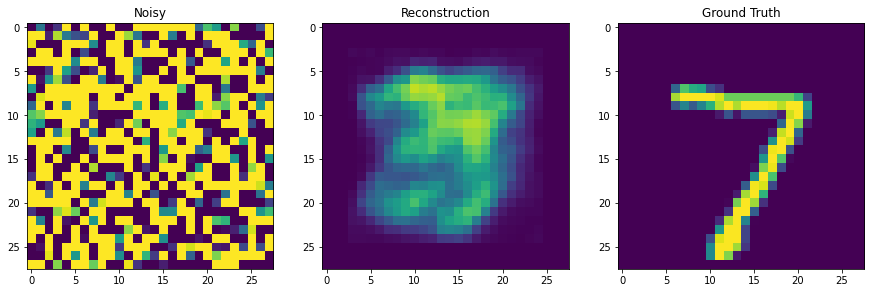

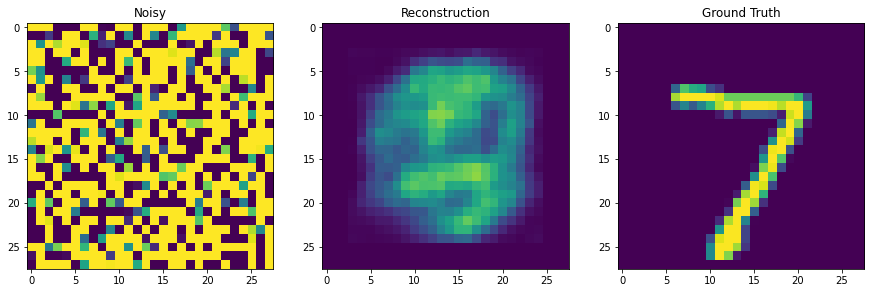

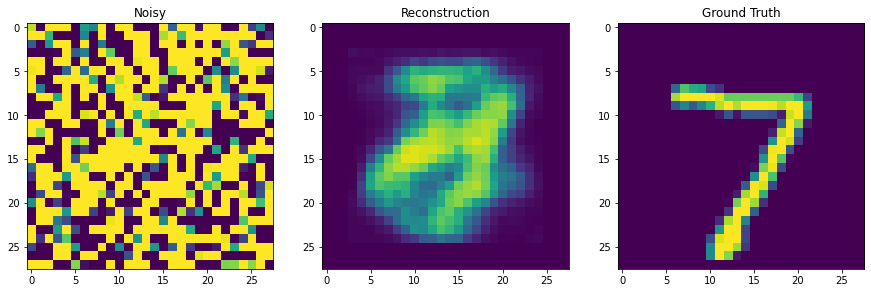

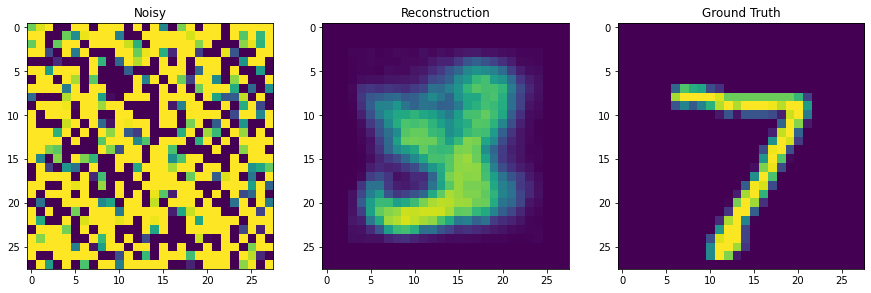

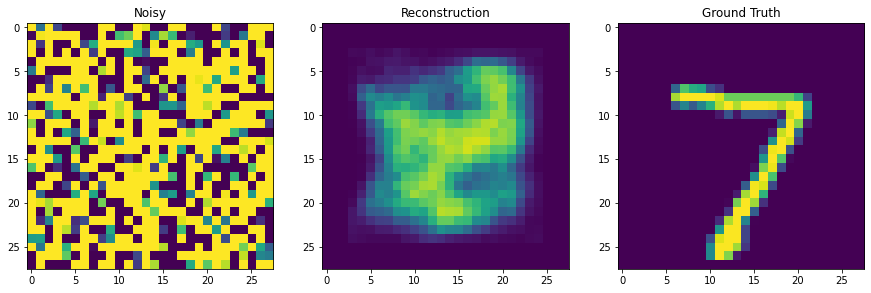

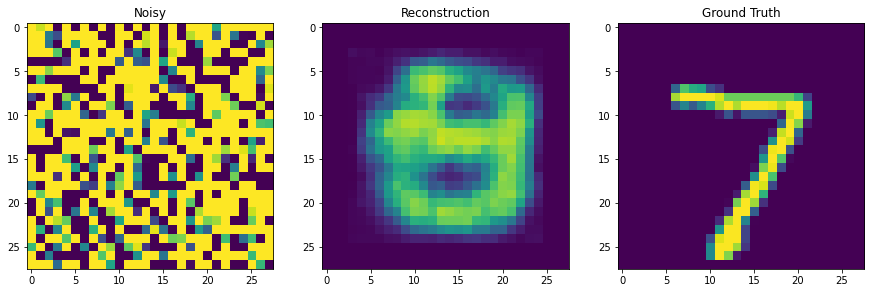

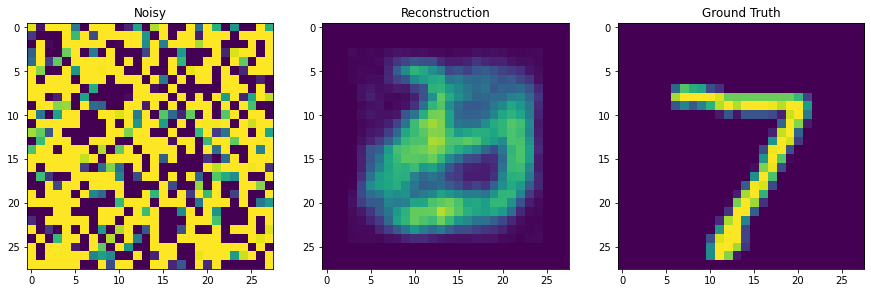

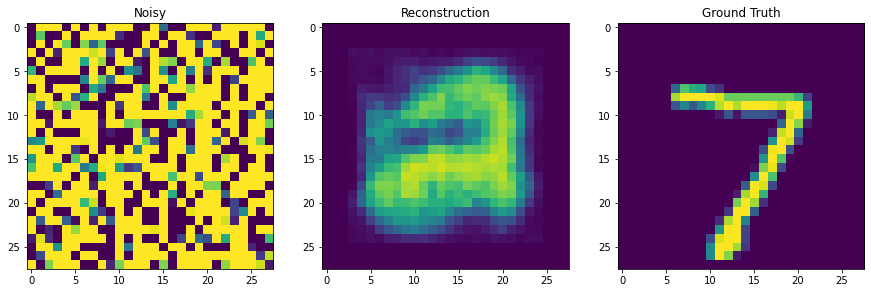

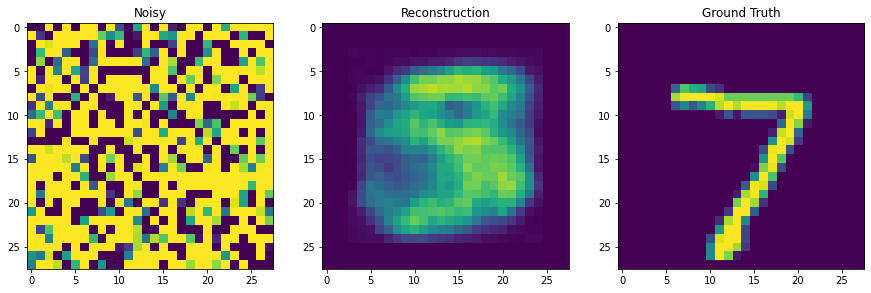

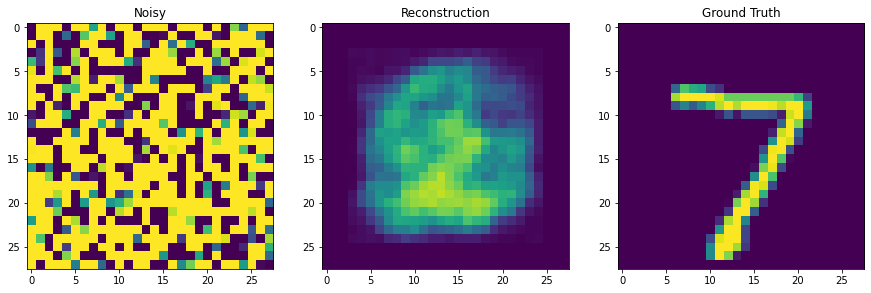

AVG RMSE FOR FIRST 10 IMAGES [[1.2733766 ]
 [1.19386366]
 [1.33381244]
 [1.12669166]
 [1.26113826]
 [1.30044816]
 [1.25189046]
 [1.24938393]
 [1.17371377]
 [1.17193759]]


In [37]:
# test results by adding different levels of noise to the images

# create noisy test set


new_test_set = np.empty((len(x_test)*20, 784))
ground_truth_test = np.empty((len(x_test)*20, 784))

for i in range(len(x_test)):
    X20 = np.empty((20, 784))
    G20 = np.empty((20, 784))
    N20 = np.empty((20, 784))
    for j in range(20):
        # use j/5 as mean of noise
        noise = j/5
        X20[j] = np.clip(x_test[i].flatten() + np.random.normal(loc=noise, scale=1, size=(784)), -1, 1)
        G20[j] = x_test[i].flatten()
        
    new_test_set[(i*20):(i*20)+20, :] = X20
    ground_truth_test[(i*20):(i*20)+20, :] = G20
    

new_test_set2 = new_test_set.reshape(-1,28, 28, 1)
ground_truth_test2 = ground_truth_test.reshape(-1,28, 28, 1)


RMSE_test = np.empty((len(new_test_set2), 1))
avg_RMSE_test = np.empty((len(x_test), 1))

count = 0
for k in range(len(x_test)):
    
    avg_rmse = []
    for j in range(20):
        
        x, y, t = sess.run([model.im_n, model.recon_im, model.im], feed_dict = {model.im : new_test_set2[[count]]})       

        gt = ground_truth_test2[k].reshape(-1,28, 28, 1)
        

#         if k % 10000==0:
#             print("\r At sample {} for noise {}".format(k, noise), end="")
        
        #print first test example        
        if k < 1:     # Plot just a few
            fig, ax = plt.subplots(1, 3, figsize = (15, 5))
            ax[0].imshow(x[0,:,:,0], vmin = -1, vmax = 1)
            ax[1].imshow(y[0,:,:,0], vmin = -1, vmax = 1)
            ax[2].imshow(gt[0,:,:,0], vmin = -1, vmax = 1)
            for i in range(3):
                ax[i].set_title(['Noisy', 'Reconstruction', 'Ground Truth'][i])
            plt.show()

        # Need AVG RMSE
        RMSE_test[count] = np.sqrt(np.mean(new_test_set2[count] - ground_truth_test2[count])**2)
        avg_rmse.append(RMSE_test[count])
        avg_RMSE_test[k] = np.mean(avg_rmse)
        count += 1


print("AVG RMSE FOR FIRST 10 IMAGES", avg_RMSE_test[:10])        


In [38]:
# #### Plot the errors for test
# import seaborn as sns
# ############ PLOTS ALL DIGITS ON ONE GRAPH #########################
# cuull = sns.color_palette("bright", len(noise_level))
# sns.palplot(cuull)
# plt.figure(figsize=(12,6), dpi=200)
# for i, key in enumerate(DAE_Test_Dict.keys()):
#     errs = DAE_Test_Dict[key]
#     plt.plot(np.arange(0, len(errs)), errs, linewidth=0.1, c=cuull[i])
#     plt.plot(np.arange(700,701), errs[700:701], linewidth=2, c=cuull[i], label="$\sigma$ = {}".format(key))
# plt.title(r"Average Test RMSE for DAE Model with Varied Noise Levels")
# plt.xlabel(r"Test Input Image")
# plt.ylabel(r"Average RMSE for 20 Noisy Versions of Each Image")
# plt.legend()
# plt.savefig("DAEtestRMSEplot.png")
# plt.show()

0.5
1
2
3
4


Text(0, 0.5, 'RMSE')

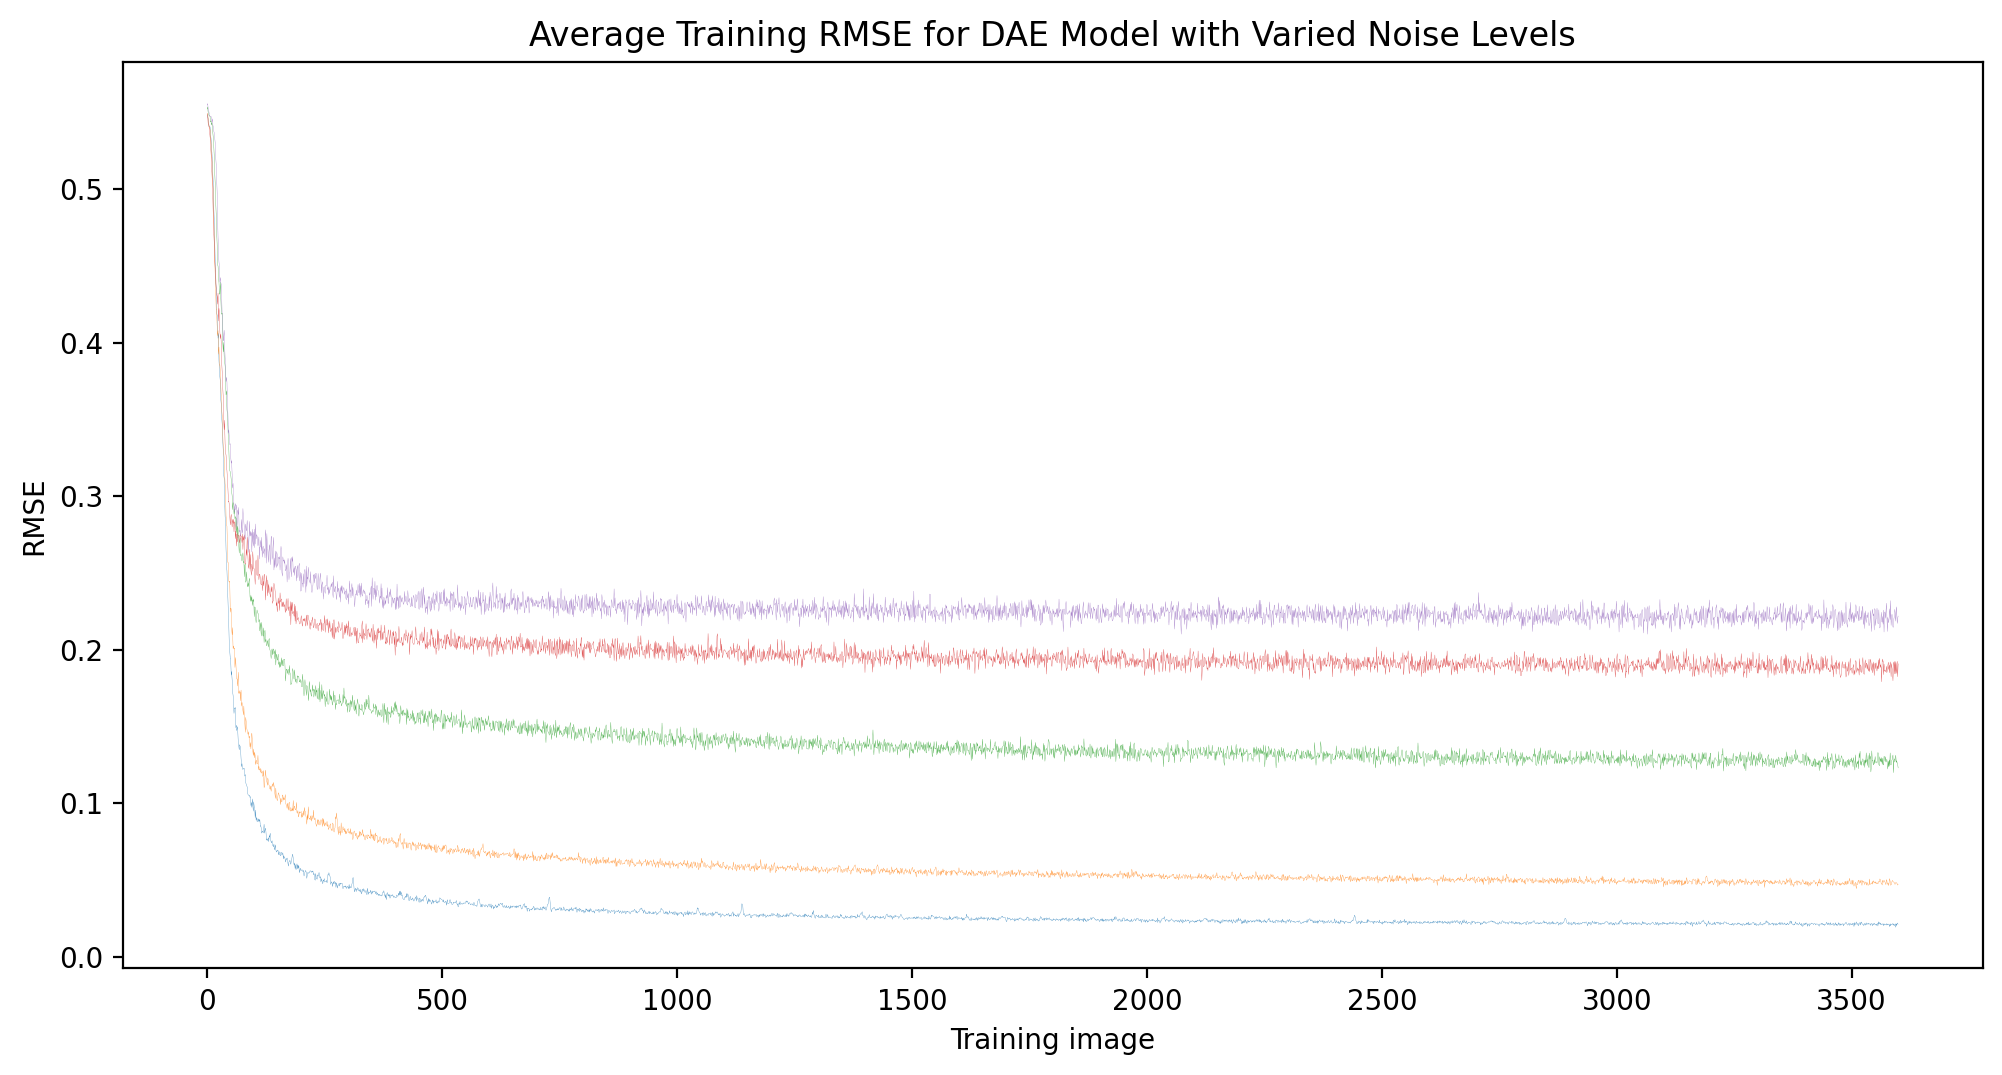

In [39]:
# plot training error
plt.figure(figsize=(12,6), dpi=200)
for i, key in enumerate(DAE_Train_Dict.keys()):
    errs = DAE_Train_Dict[key]
    print(key)
    plt.plot(np.arange(0, len(errs)), errs, linewidth=0.1)
#     plt.plot(np.arange(700,701), errs[700:701], linewidth=2, c=cuull[i], label="$\sigma$ = {}".format(key))
plt.title(r"Average Training RMSE for DAE Model with Varied Noise Levels")
plt.xlabel(r"Training image")
plt.ylabel(r"RMSE")

In [40]:
# generate dict which measures test error by noise

noiseDict = {}
for i in range(20):
    noiseVal = i/4
    noiseDict[noiseVal] =RMSE_test[i::20]
    

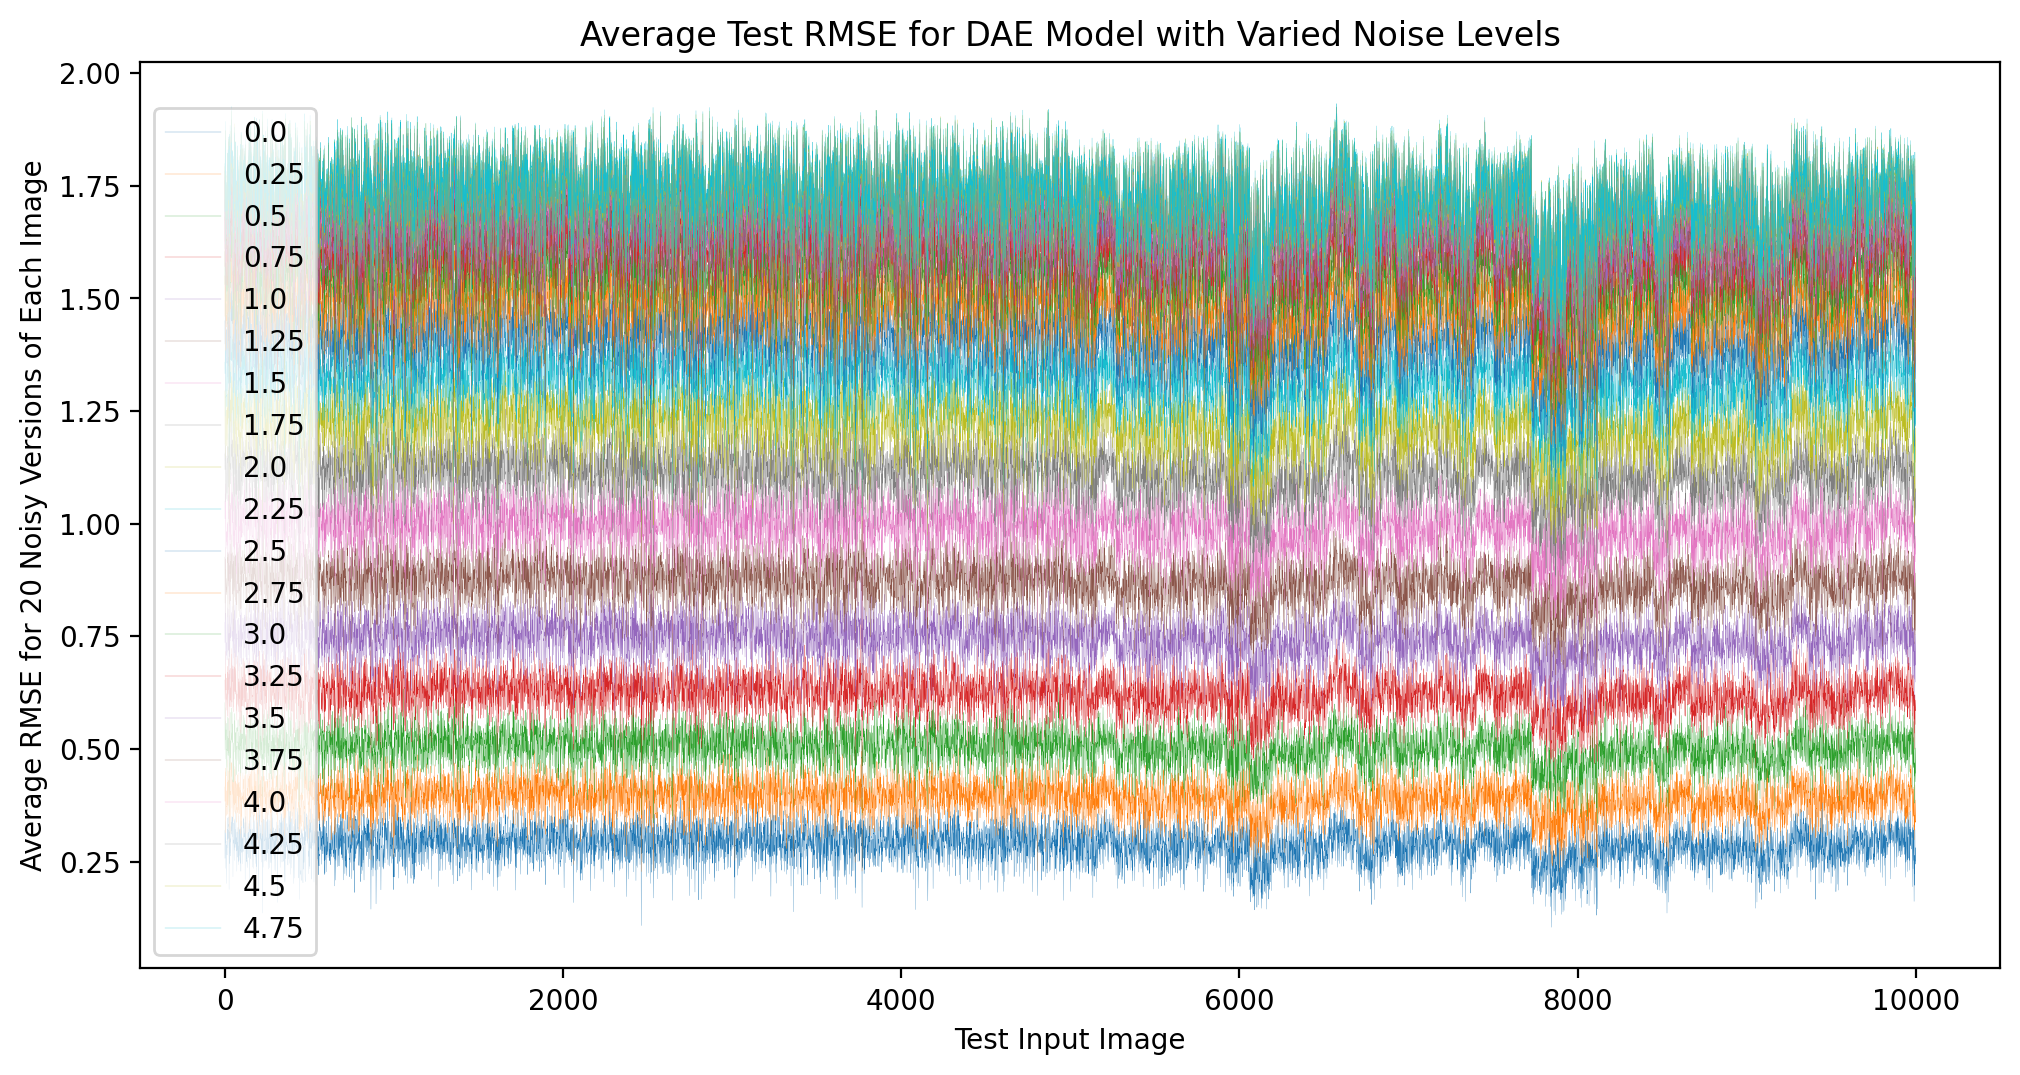

In [41]:
# plot test errors

plt.figure(figsize=(12,6), dpi=200)
for i, key in enumerate(noiseDict.keys()):
    errs = noiseDict[key]
#     print(key)
    plt.plot(np.arange(0, len(errs)), errs, linewidth=0.1,label=key)
#     plt.plot(np.arange(700,701), errs[700:701], linewidth=2, c=cuull[i], label="$\sigma$ = {}".format(key))
plt.title(r"Average Test RMSE for DAE Model with Varied Noise Levels")
plt.xlabel(r"Test Input Image")
plt.ylabel(r"Average RMSE for 20 Noisy Versions of Each Image")

plt.legend()
plt.show()